In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.applications.xception import Xception
#from keras.applications.InceptionResNetV2 import InceptionResNetV2
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
from keras.models import Model
import keras

In [ ]:

IMAGE_SIZE = 300
pretrained_model = applications.VGG16(input_shape=(300,300, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
IMAGE_SIZE = 224
pretrained_model =applications.Xception(input_shape=(300,300, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/imagesdata-20201224T162256Z-001.zip (Unzipped Files)/imagesdata/train',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical')


Found 1853 images belonging to 2 classes.


In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/imagesdata-20201224T162256Z-001.zip (Unzipped Files)/imagesdata/test',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 241 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=None
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
4/4 [==============================] - 90s 24s/step - loss: 4.7210 - accuracy: 0.5281 - val_loss: 2.8095 - val_accuracy: 0.7095
Epoch 2/30
4/4 [==============================] - 37s 9s/step - loss: 4.5561 - accuracy: 0.6302 - val_loss: 11.0651 - val_accuracy: 0.3278
Epoch 3/30
4/4 [==============================] - 35s 9s/step - loss: 2.1783 - accuracy: 0.7365 - val_loss: 5.8621 - val_accuracy: 0.4191
Epoch 4/30
4/4 [==============================] - 33s 8s/step - loss: 2.9810 - accuracy: 0.7249 - val_loss: 9.0755 - val_accuracy: 0.3568
Epoch 5/30
4/4 [==============================] - 29s 8s/step - loss: 1.9367 - accuracy: 0.7354 - val_loss: 5.3666 - val_accuracy: 0.4647
Epoch 6/30
4/4 [==============================] - 29s 8s/step - loss: 1.6590 - accuracy: 0.8385 - val_loss: 15.0187 - val_accuracy: 0.2988
Epoch 7/30
4/4 [==============================] - 26s 7s/step - loss: 1.3128 - accuracy: 0.8753 - val_loss: 5.6493 - val_accuracy: 0.4813
Epoch 8/30
4/4 [===============

**Model Image**

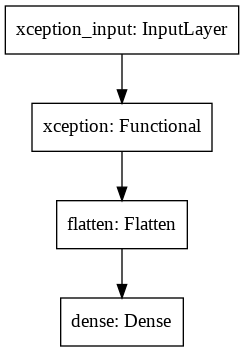

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-unceptionv3.png')

**Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 409602    
Total params: 21,271,082
Trainable params: 409,602
Non-trainable params: 20,861,480
_________________________________________________________________


**Accuracy and Loss Graph**

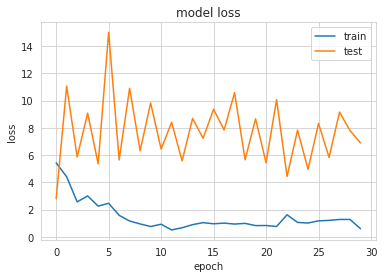

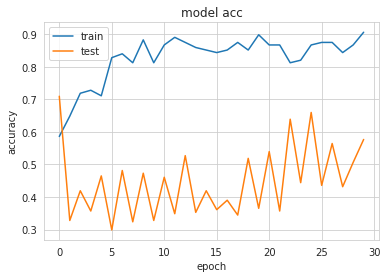

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cf = confusion_matrix(true_classes,pred)
cf


array([[118,  51],
       [ 51,  21]])

**Confusion Matrix Image**

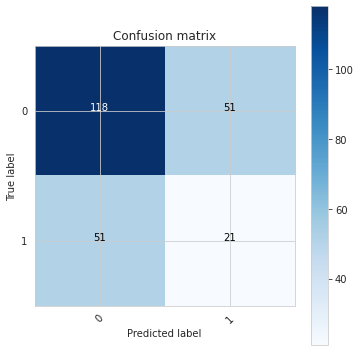

In [ ]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = range(2))

In [ ]:
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       169
           1       0.29      0.29      0.29        72

    accuracy                           0.58       241
   macro avg       0.49      0.49      0.49       241
weighted avg       0.58      0.58      0.58       241

